In [2]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# Check if folder input exists

# Define the folder name
folder_name = '../input'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../input' folder already exists.


In [4]:
# Webscrapping Wikipedia table to get the NASDAQ 100 components
page = requests.get("https://en.wikipedia.org/wiki/Nasdaq-100")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table',id='constituents',class_="wikitable sortable")

In [5]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Company,Symbol,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
5,Amazon,AMZN,Consumer Discretionary,Broadline Retail
6,American Electric Power,AEP,Utilities,Electric Utilities
7,Amgen,AMGN,Health Care,Biotechnology
8,Analog Devices,ADI,Information Technology,Semiconductors
9,Ansys,ANSS,Information Technology,Application Software


In [6]:
wiki.head(80)

,Company,Symbol,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
75,Old Dominion Freight Line,ODFL,Industrials,Cargo Ground Transportation
76,Onsemi,ON,Information Technology,Semiconductors
77,Paccar,PCAR,Industrials,Construction Machinery & Heavy Transportation ...
78,Palantir Technologies,PLTR,Information Technology,Internet Services & Infrastructure


In [7]:
# Get the data for the stock 
index_list = wiki['Symbol'].tolist()
index_list.append('^NDX')

In [8]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False,multi_level_index=False,actions=True,auto_adjust=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/102 [00:00<?, ?it/s]

In [9]:
# Configuration of different parameters of the notebook
ticker = '^NDX'
year = '2025'

In [10]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
1985-10-01,112.139999,112.139999,0.0,112.160004,110.565002,110.620003,0.0,153160000
1985-10-02,110.824997,110.824997,0.0,112.540001,110.779999,112.139999,0.0,164640000
1985-10-03,110.870003,110.870003,0.0,111.184998,110.120003,110.839996,0.0,147300000
1985-10-04,110.074997,110.074997,0.0,110.870003,109.855003,110.870003,0.0,147900000
1985-10-07,108.199997,108.199997,0.0,110.135002,108.175003,110.074997,0.0,128640000
1985-10-08,107.160004,107.160004,0.0,108.269997,106.750000,108.199997,0.0,144100000
1985-10-09,108.629997,108.629997,0.0,108.989998,107.114998,107.160004,0.0,156200000
1985-10-10,109.434998,109.434998,0.0,109.510002,107.809998,108.629997,0.0,154840000
1985-10-11,111.050003,111.050003,0.0,111.120003,109.425003,109.434998,0.0,158220000


In [11]:
# Check DataFrame tail
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-02-07,21491.310547,21491.310547,0.0,21869.320312,21465.460938,21776.279297,0.0,7748940000
2025-02-10,21756.730469,21756.730469,0.0,21793.130859,21645.169922,21670.060547,0.0,9535440000
2025-02-11,21693.519531,21693.519531,0.0,21776.250000,21625.509766,21629.109375,0.0,9269380000
2025-02-12,21719.259766,21719.259766,0.0,21745.660156,21454.189453,21475.410156,0.0,7946550000
2025-02-13,22030.710938,22030.710938,0.0,22038.150391,21758.039062,21786.160156,0.0,8414510000
2025-02-14,22114.689453,22114.689453,0.0,22139.429688,22010.349609,22038.609375,0.0,7995720000
2025-02-18,22164.609375,22164.609375,0.0,22191.369141,22029.580078,22176.009766,0.0,8683170000
2025-02-19,22175.599609,22175.599609,0.0,22222.609375,22045.750000,22121.730469,0.0,8171530000
2025-02-20,22068.060547,22068.060547,0.0,22148.439453,21878.750000,22132.710938,0.0,7329270000


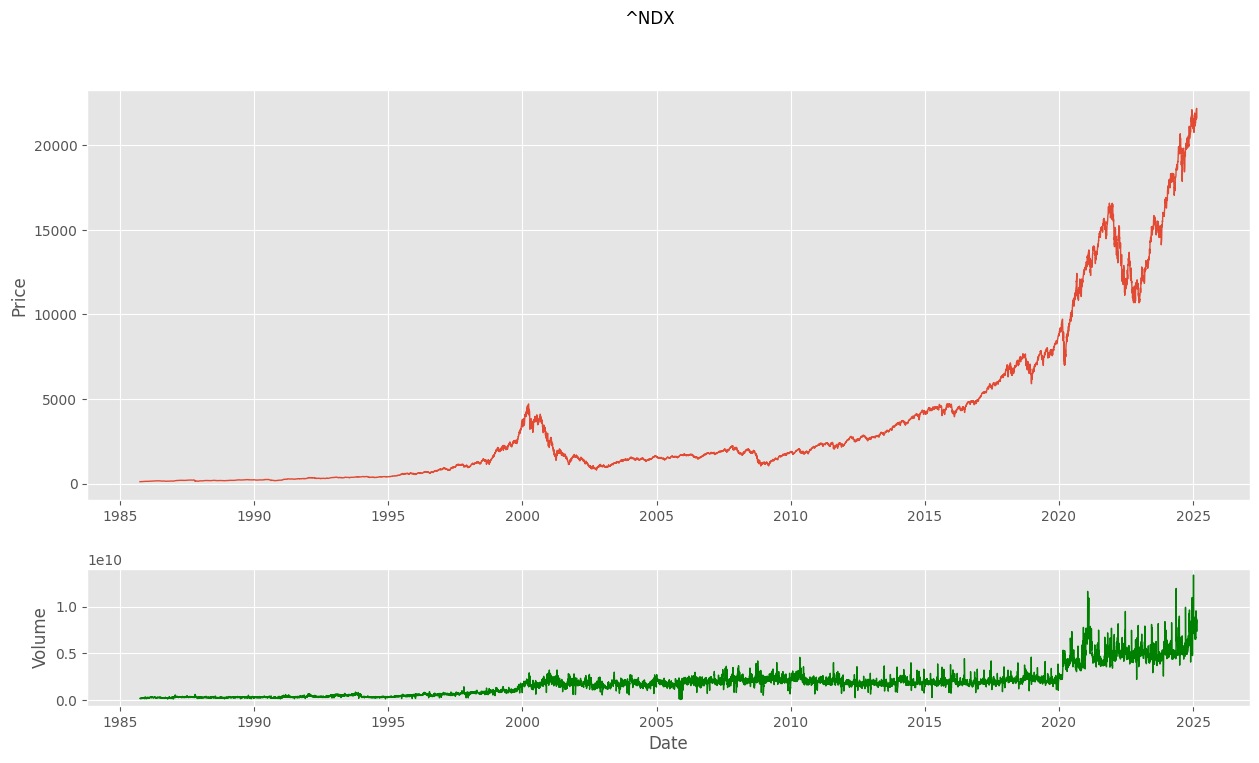

In [12]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [13]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [14]:
# Group per year and calculate cummulative return
stock_ticker['Year'] = stock_ticker.index.year
annual_data = stock_ticker.groupby('Year').agg(Adj_Close=('Adj Close','last'))
annual_data['Return'] = annual_data["Adj_Close"].pct_change()*100
annual_data

,Adj_Close,Return
Year,,
1985,132.294998,NaN
1986,141.404999,6.886126
1987,156.250000,10.498215
1988,177.410004,13.542402
1989,223.835007,26.168199
1990,200.529999,-10.411690
1991,330.855011,64.990282
1992,360.184998,8.864906
1993,398.279999,10.576510


In [15]:
# Plotly
fig = make_subplots()

# Add colors
colors = ['green' if x >= 0 else 'red' for x in annual_data['Return']]

# Graph (1,1)
fig.add_trace(go.Bar(y=annual_data['Return'],x=annual_data['Return'].index,text=round(annual_data['Return'],2),textposition='outside',marker_color=colors,hoverinfo='skip'),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Returns", row=1, col=1)

fig.update_layout(xaxis=dict(tickvals=annual_data.index,tickangle=-45),height=800, width=1300,title=f"Returns per year {ticker}")

fig.show()

In [16]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

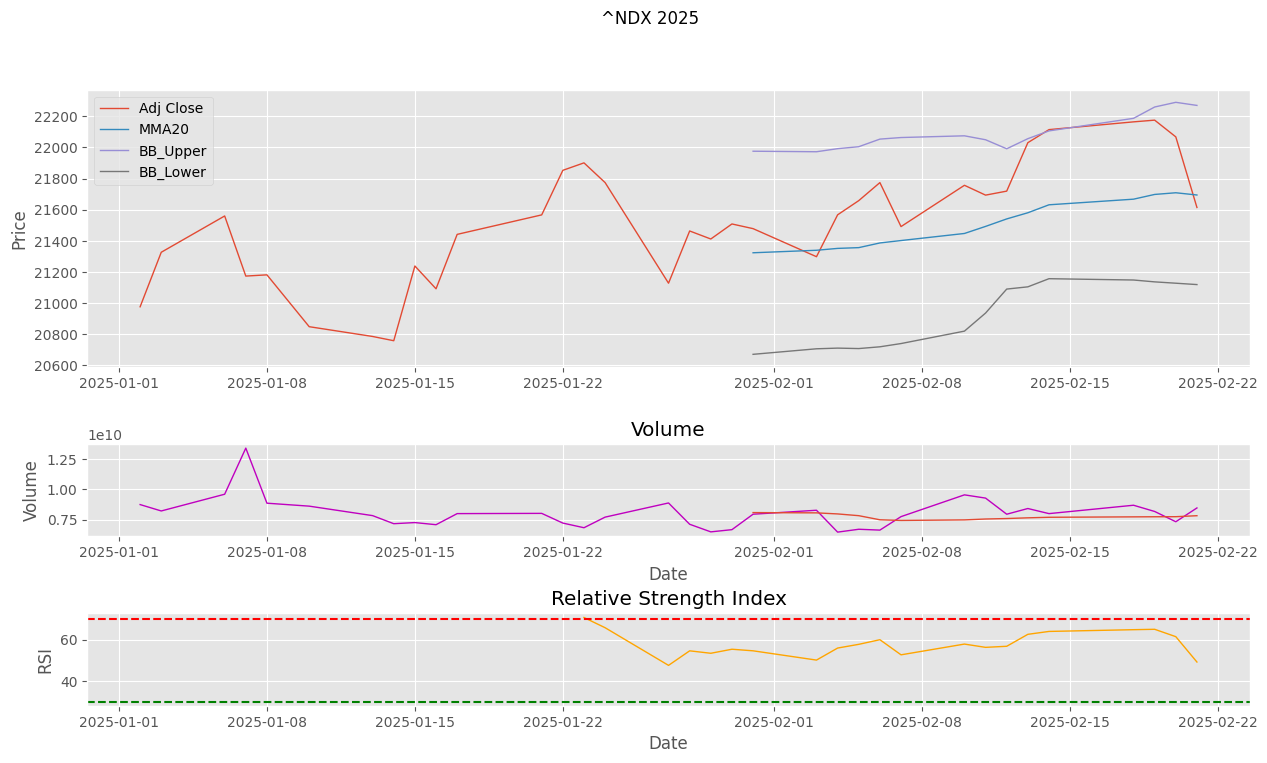

In [17]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [18]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [19]:
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Year,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,,,,
2025-02-07,21491.310547,21491.310547,0.0,21869.320312,21465.460938,21776.279297,0.0,7748940000,2025,21401.520508,22063.819865,20739.221150,52.632452,-1.298608
2025-02-10,21756.730469,21756.730469,0.0,21793.130859,21645.169922,21670.060547,0.0,9535440000,2025,21446.978027,22074.863142,20819.092912,57.838758,1.235010
2025-02-11,21693.519531,21693.519531,0.0,21776.250000,21625.509766,21629.109375,0.0,9269380000,2025,21492.417969,22049.571587,20935.264350,56.252997,-0.290535
2025-02-12,21719.259766,21719.259766,0.0,21745.660156,21454.189453,21475.410156,0.0,7946550000,2025,21540.510449,21991.523477,21089.497422,56.772731,0.118654
2025-02-13,22030.710938,22030.710938,0.0,22038.150391,21758.039062,21786.160156,0.0,8414510000,2025,21580.153516,22056.457040,21103.849991,62.567595,1.433986
2025-02-14,22114.689453,22114.689453,0.0,22139.429688,22010.349609,22038.609375,0.0,7995720000,2025,21631.325488,22106.437231,21156.213745,63.970122,0.381188
2025-02-18,22164.609375,22164.609375,0.0,22191.369141,22029.580078,22176.009766,0.0,8683170000,2025,21667.497949,22187.250920,21147.744978,64.814084,0.225732
2025-02-19,22175.599609,22175.599609,0.0,22222.609375,22045.750000,22121.730469,0.0,8171530000,2025,21697.952441,22260.115214,21135.789669,65.008415,0.049585
2025-02-20,22068.060547,22068.060547,0.0,22148.439453,21878.750000,22132.710938,0.0,7329270000,2025,21708.705469,22290.214304,21127.196634,61.433065,-0.484943


  0%|          | 0/102 [00:00<?, ?it/s]

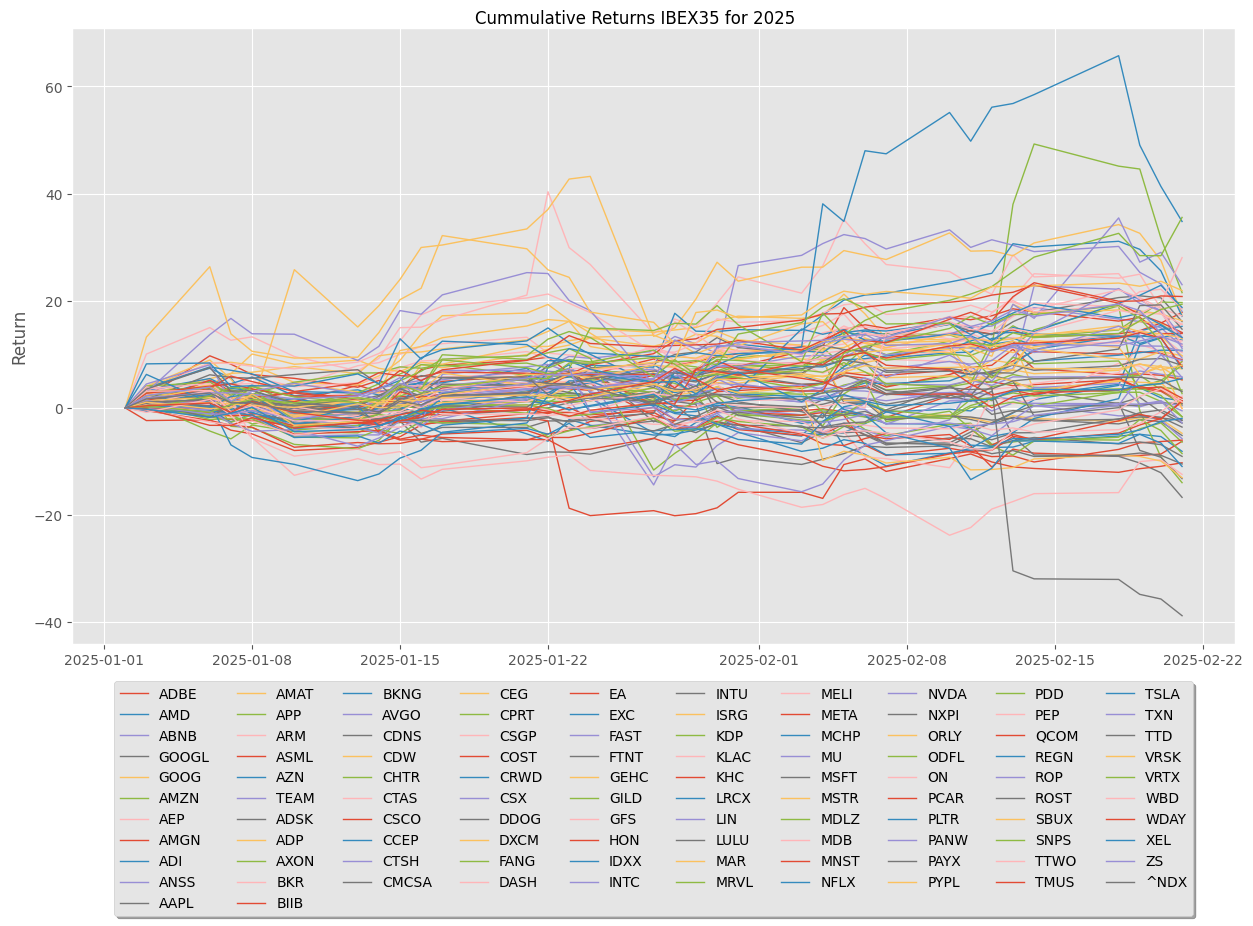

In [20]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [21]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/102 [00:00<?, ?it/s]

In [22]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Symbol','Cummulative_Return'])
cum = wiki[['Symbol','Company']].merge(cum,on='Symbol')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/102 [00:00<?, ?it/s]

,Symbol,Company,Date,Cummulative_Return
0,PDD,PDD Holdings,2025-02-21,35.555782
1,PLTR,Palantir Technologies,2025-02-21,34.791854
2,MELI,MercadoLibre,2025-02-21,28.045326
3,INTC,Intel,2025-02-21,22.997041
4,SBUX,Starbucks,2025-02-21,21.901404
...,...,...,...,...
96,PYPL,PayPal,2025-02-21,-13.030869
97,CDNS,Cadence Design Systems,2025-02-21,-13.209705
98,AXON,Axon Enterprise,2025-02-21,-13.960003
99,DDOG,Datadog,2025-02-21,-16.702642


In [23]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Symbol,Company,Date,Cummulative_Return
0,PDD,PDD Holdings,2025-02-21,35.555782
1,PLTR,Palantir Technologies,2025-02-21,34.791854
2,MELI,MercadoLibre,2025-02-21,28.045326
3,INTC,Intel,2025-02-21,22.997041
4,SBUX,Starbucks,2025-02-21,21.901404
5,APP,AppLovin,2025-02-21,21.513839
6,TMUS,T-Mobile US,2025-02-21,20.789876
7,GILD,Gilead Sciences,2025-02-21,19.666957
8,VRTX,Vertex Pharmaceuticals,2025-02-21,19.341477
9,LRCX,Lam Research,2025-02-21,18.746540


In [24]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).tail(30)

,Symbol,Company,Date,Cummulative_Return
71,CSX,CSX Corporation,2025-02-21,0.435321
72,MSTR,MicroStrategy,2025-02-21,-0.106666
73,GFS,GlobalFoundries,2025-02-21,-0.117701
74,ANSS,Ansys,2025-02-21,-0.550499
75,SNPS,Synopsys,2025-02-21,-1.638530
76,AMZN,Amazon,2025-02-21,-1.652892
77,REGN,Regeneron Pharmaceuticals,2025-02-21,-1.951928
78,MSFT,Microsoft,2025-02-21,-2.281880
79,CMCSA,Comcast,2025-02-21,-2.339108
80,NVDA,Nvidia,2025-02-21,-2.805296
